# Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
df = pd.read_csv('data/bankloan.csv')

# Basic Info
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

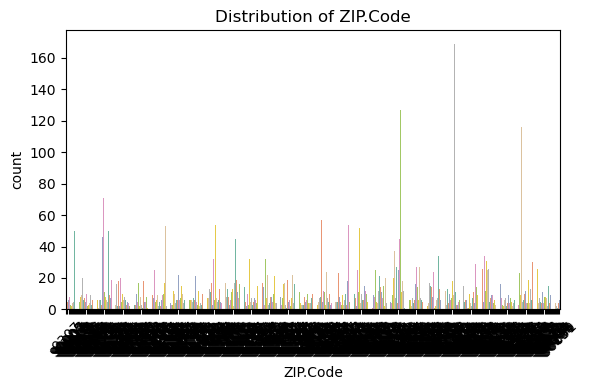

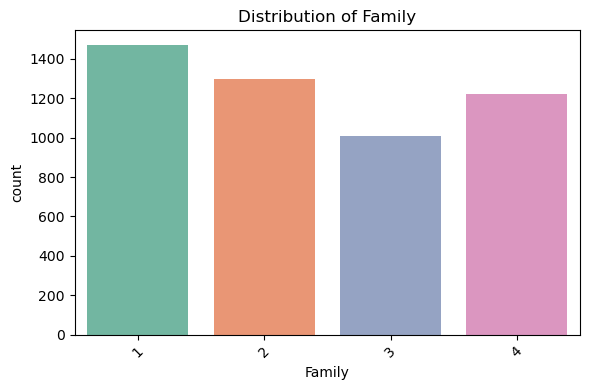

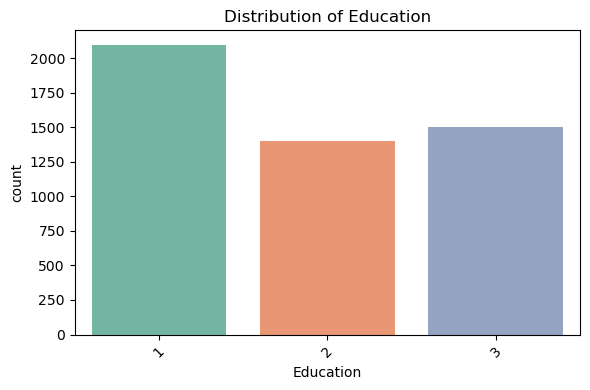

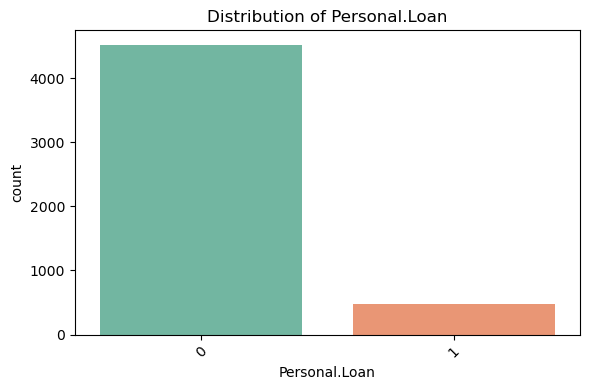

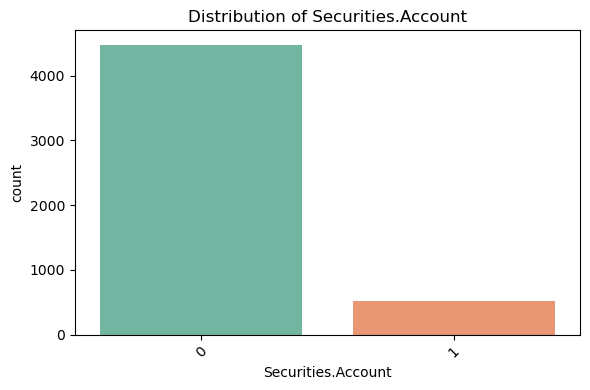

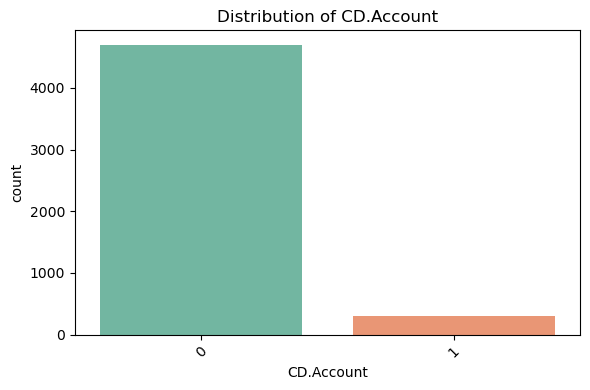

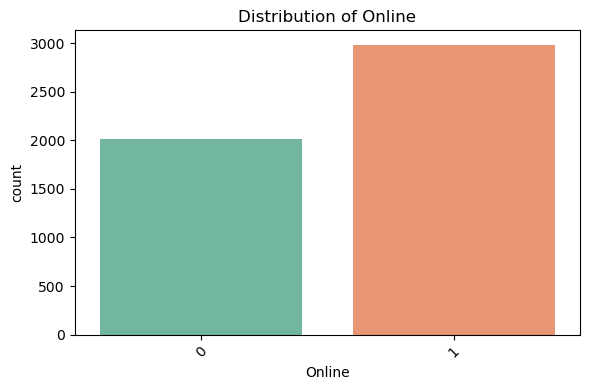

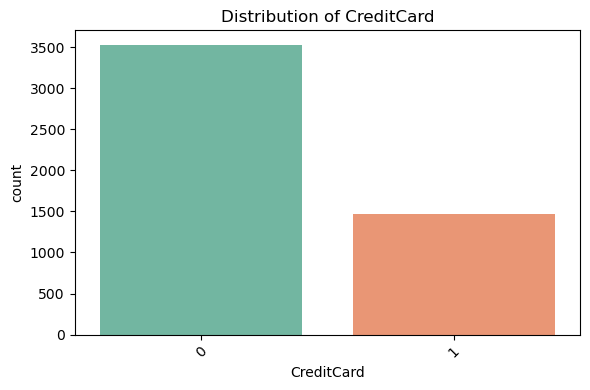

In [ ]:
# Count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

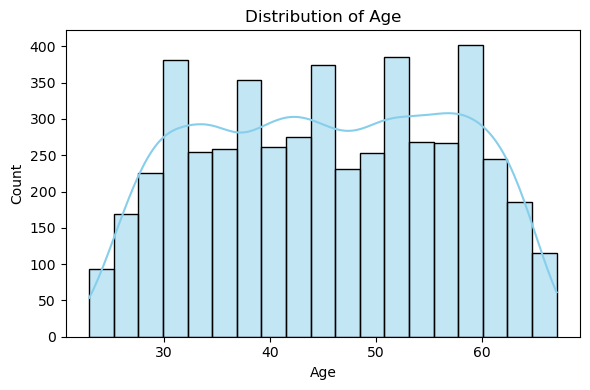

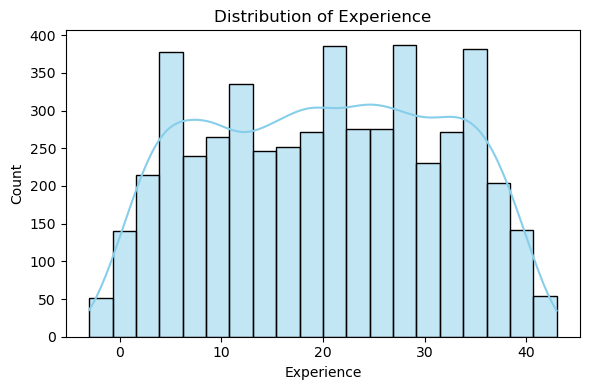

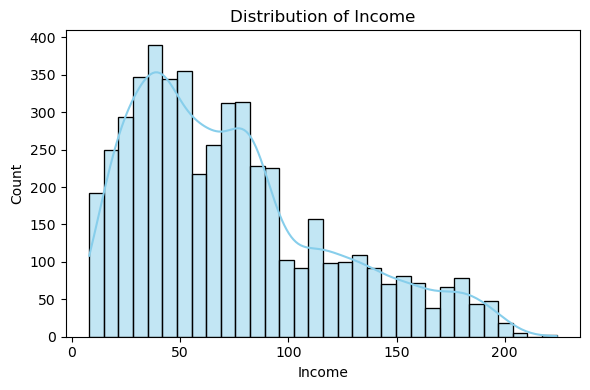

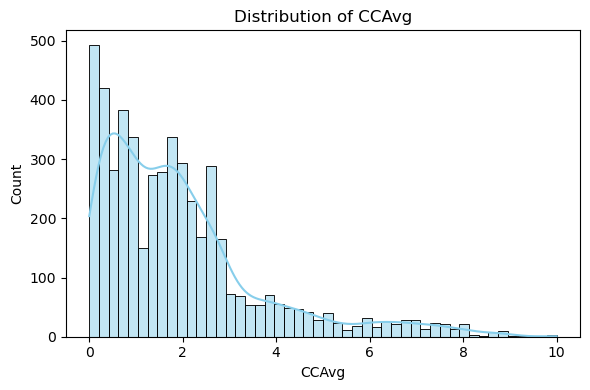

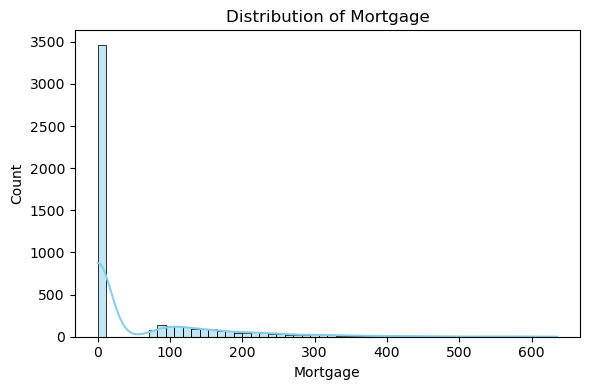

In [ ]:
# Distribution plots for continuous variables
continuous_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


# Cleaning the Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [3]:
df = pd.read_csv('data/bankloan.csv')

In [4]:
# Drop ID and ZipCode (not useful for prediction)
df.drop(['ID', 'ZIP.Code'], axis=1, inplace=True)

In [5]:
# Features and Target
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

In [6]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Save the fitted scaler - to use for streamlit UI
import joblib
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [8]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print("Data is ready.")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))

Data is ready.
X_train shape: (4000, 11)
y_train distribution:
 Personal.Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


# Building Model with Keras

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [11]:
# Class weight works only with numpy arrays
y_train = y_train.to_numpy()


In [12]:
# Compute class weights to handle imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Properly map weights to actual class labels
class_weight_dict = dict(zip(classes, class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: 0.5530973451327433, 1: 5.208333333333333}


In [ ]:
# Build the model with dropout to prevent overfitting
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [15]:
# Define callbacks for early stopping, model checkpointing and logging

# Callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("bankloan_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="./logs/loan_model")

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [16]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4288 - auc: 0.7382 - loss: 0.6427 - val_accuracy: 0.8537 - val_auc: 0.9451 - val_loss: 0.3723
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - auc: 0.9319 - loss: 0.3504 - val_accuracy: 0.8763 - val_auc: 0.9639 - val_loss: 0.2796
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - auc: 0.9594 - loss: 0.2775 - val_accuracy: 0.9075 - val_auc: 0.9712 - val_loss: 0.2108
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - auc: 0.9692 - loss: 0.2238 - val_accuracy: 0.9000 - val_auc: 0.9741 - val_loss: 0.2242
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - auc: 0.9645 - loss: 0.2170 - val_accuracy: 0.9100 - val_auc: 0.9756 - val_loss: 0.2082
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9081 - auc: 0.9744 - loss: 0.2109 - val_accuracy: 0.9200 - val_auc: 0.9786 - val_loss: 0.1800
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 

# Evaluating the Model

In [17]:
loss, accuracy, auc = model.evaluate(X_test, y_test.to_numpy(), verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")


Test Loss: 0.1086
Test Accuracy: 0.9570
Test AUC: 0.9940


In [18]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       904
           1       0.70      0.97      0.81        96

    accuracy                           0.96      1000
   macro avg       0.85      0.96      0.89      1000
weighted avg       0.97      0.96      0.96      1000

[[864  40]
 [  3  93]]


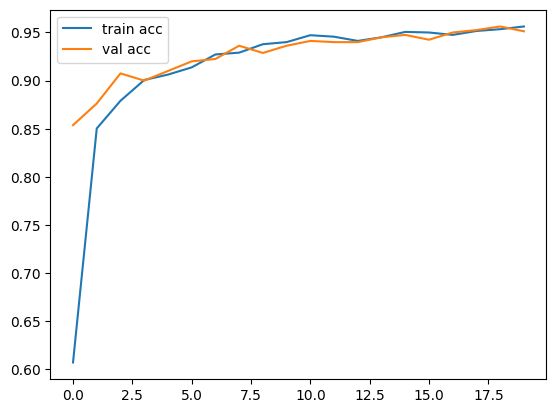

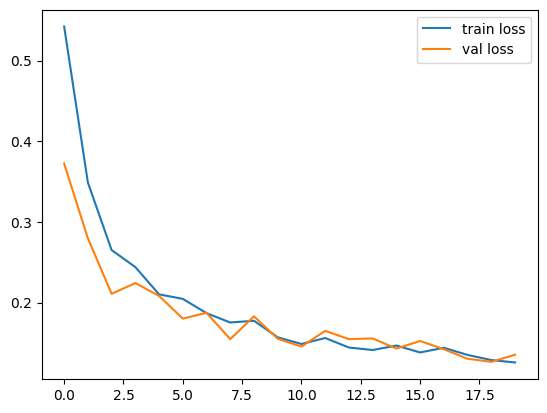

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# Saving Model

In [20]:
model.save("bankloan_model.keras") 

# Interpreting Results

### Test Metrics
- Test Loss: 0.1086 — Low, which indicates good performance.
- Test Accuracy: 95.7% — Excellent overall accuracy.
- Test AUC: 0.9940 — Outstanding. This indicates your model separates the classes very well.

### Training/Validation Accuracy Plot
- The training and validation accuracy curves are close together and steadily increase.
- There's no major gap or divergence → No overfitting is apparent.
- Training accuracy approaches ≈ 95%+, which matches validation accuracy meaning this is healthy training

### Training/Validation Loss Plot
- Loss decreases consistently for both training and validation.
- Validation loss fluctuates slightly but continues to drop → Suggests good generalization.
- No sharp rise in validation loss means no overfitting.

### Classification Report
- Class 0: Perfect precision — no false positives, and high recall.
- Class 1: Good recall (97%) — you’re catching almost all true positives.
- Precision is lower (70%) → means you're getting some false positives on class 1.
- F1-score of 0.81 for class 1 is solid for an imbalanced dataset.

### Confusion Matrix
- 3 false negatives (missed positives)
- 40 false positives (predicted positive when it's negative) — this is why the precision dips

# Report

# Lessons to Learn

Nathan: Not every technique is universally applicable. LSTMs, while powerful for sequential data like time series or text, are not well-suited for tabular datasets like structured loan applications. Batch Normalization, often used in deep convolutional networks, did not significantly improve performance in this simpler fully connected architecture, and in some cases, even slowed training. In future projects, I’ll be more intentional about selecting techniques based on the nature of the problem rather than the novelty of the method.